In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.combinations import combine

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2025-01-27 11:15:30.267789: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 11:15:30.275791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737976530.285431   38029 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737976530.288285   38029 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 11:15:30.298267: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Num GPUs Available:  1


$$
\text{Data Analysis}
$$

$$
\text{Information about titanic data}
$$
https://en.wikipedia.org/wiki/Titanic

$$
\text{Total passengers on board 2208}
$$
$$
\text{Survivors approx 710 -> 32.2 percent}
$$
$$
\text{Female survival rate: 74.2 vs 18.9 for males}
$$
$$
\text{1st Class: 62–63 \% survival. 2nd Class: 47–48\%. 3rd Class: 24–25\%}
$$
$$
\text{Decks: A-B-C -> 1class, D -> 1/2class, E-> 2/3class, F-G -> 3class}
$$
$$
\text{Given dataset}
$$
$$
\text{Total passengers 1309}
$$
$$
\text{Information about 891 survival value}
$$
$$
\text{}
$$

In [6]:
df_train = pd.read_csv('../kagle_data/titanic/train.csv')
df_test = pd.read_csv('../kagle_data/titanic/test.csv')

In [36]:
df_test_new = df_test.copy()
df_test_new['Survived'] = np.nan

In [37]:
df_full = pd.concat([df_train, df_test_new], axis=0, ignore_index=True)

In [38]:
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
df_full.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


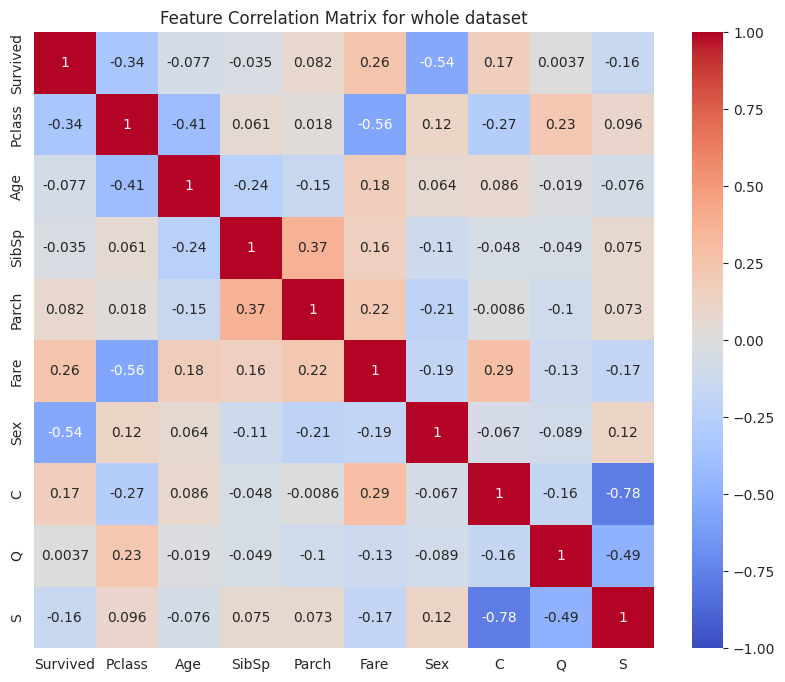

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df_full[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
df_numeric['Sex'] = pd.get_dummies(df_full['Sex'], drop_first=True)
embarked_dummies = pd.get_dummies(df_full['Embarked'])
df_numeric = pd.concat([df_numeric, embarked_dummies], axis=1)

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix for whole dataset')
plt.show()

$$
\text{High corr between Age and Pclass, we can fill missing values in age by median of the passengers age in given Pclass sorted by sex}
$$
$$
\text{Small corr between SibSp/Parch and Survived, might try to make some additional columns from that data}
$$
$$
\text{Combine Decks to 1class, mixed 1/2class, mixed 2/3class, 3class }
$$
$$
\text{}
$$
$$
\text{}
$$

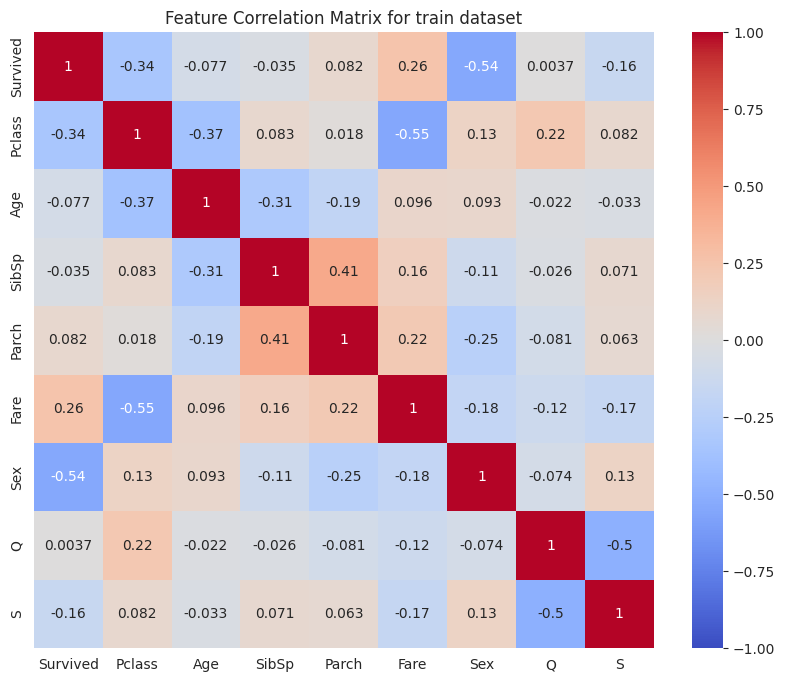

In [48]:
df_numeric = df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
df_numeric['Sex'] = pd.get_dummies(df_train['Sex'], drop_first=True)
embarked_dummies = pd.get_dummies(df_train['Embarked'])
df_numeric = pd.concat([df_numeric, embarked_dummies], axis=1)

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix for train dataset')
plt.show()

In [66]:
title_split = df_full['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)
df_full['Title'] = title_split[0].str.strip()
df_full['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [73]:
pd.crosstab(df_full['Title'], df_full['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [71]:
df_full['Title'] = df_full['Title'].replace('Mile', 'Miss')
df_full['Title'] = df_full['Title'].replace('Ms', 'Miss')
df_full['Title'] = df_full['Title'].replace('Mme', 'Mrs')

$$
\text{Fill cabin na}
$$


In [54]:
cabin_df = df_train[['Cabin']].copy()

In [55]:
cabin_df['Cabin_data'] = cabin_df['Cabin'].isnull().apply(lambda x: not x)
cabin_df.head()

,Cabin,Cabin_data
0,NaN,False
1,C85,True
2,NaN,False
3,C123,True
4,NaN,False


In [56]:
cabin_df['Deck'] = cabin_df['Cabin'].str.slice(0,1)
cabin_df['Room'] = cabin_df['Cabin'].str.slice(1,5).str.extract("([0-9]+)").astype(np.float32)
cabin_df[cabin_df['Cabin_data']]

,Cabin,Cabin_data,Deck,Room
1,C85,True,C,85.0
3,C123,True,C,123.0
6,E46,True,E,46.0
10,G6,True,G,6.0
11,C103,True,C,103.0
...,...,...,...,...
871,D35,True,D,35.0
872,B51 B53 B55,True,B,51.0
879,C50,True,C,50.0
887,B42,True,B,42.0


In [57]:
cabin_df.drop(['Cabin', 'Cabin_data'], axis=1, inplace=True)

In [58]:
cabin_df['Deck'] = cabin_df['Deck'].fillna('N')
cabin_df['Room'] = cabin_df['Room'].fillna(cabin_df['Room'].mean())

In [59]:
cabin_df.head()

,Deck,Room
0,N,50.490002
1,C,85.000000
2,N,50.490002
3,C,123.000000
4,N,50.490002


In [145]:
from sklearn.preprocessing import OneHotEncoder

numeric_features = ['Room']
categorical_features = ['Deck']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encode = encoder.fit_transform(cabin_df[categorical_features])
one_hot_df = pd.DataFrame(one_hot_encode, columns=encoder.get_feature_names_out(categorical_features))

df_encoded = pd.concat([cabin_df.drop(categorical_features, axis=1), one_hot_df], axis=1)

In [146]:
df_encoded

,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,85.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,123.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,42.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,148.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [160]:
concat_list = [df_train, df_encoded]
titanic_train_df = pd.concat(concat_list, axis=1)

In [161]:
titanic_train_df = titanic_train_df.drop(['Cabin', 'Ticket', 'Name'], axis=1)


In [162]:
titanic_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,0,3,1,22.0,1,0,7.2500,S,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,38.0,1,0,71.2833,C,85.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,S,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,35.0,1,0,53.1000,S,123.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,1,35.0,0,0,8.0500,S,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [163]:
num_titanic = titanic_train_df.drop(['Embarked'], axis=1)

$$
\text{One hot encoding to make dataset numbers, show some correlations}
$$

In [165]:

numeric_columns = list(num_titanic)
categorical_columns = ['Embarked']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encode = encoder.fit_transform(titanic_train_df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encode, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([titanic_train_df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

In [167]:
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,85.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,123.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,50.490002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [168]:
corr = df_encoded.corr()

$$
\text{Lower class passengers appear to have high possibility of unknown Deck number -> Cabin}
$$

In [169]:
corr["Pclass"].sort_values(ascending=False)

Pclass        1.000000
Deck_N        0.725541
Embarked_Q    0.221009
Sex           0.131900
SibSp         0.083081
Embarked_S    0.074053
Deck_G        0.055561
Parch         0.018443
Deck_F        0.011063
Room         -0.010850
Deck_T       -0.052496
Deck_A       -0.204934
Deck_E       -0.230091
Embarked_C   -0.243292
Deck_D       -0.278690
Survived     -0.338481
Deck_B       -0.369572
Age          -0.413583
Deck_C       -0.417048
Fare         -0.549500
Name: Pclass, dtype: float64

$$
\text{Also no cabin data is correlated with lower fare value }
$$

In [170]:
corr["Fare"].sort_values(ascending=False)

Fare          1.000000
Deck_B        0.386297
Deck_C        0.364318
Embarked_C    0.269335
Survived      0.257307
Parch         0.216225
SibSp         0.159651
Age           0.122692
Deck_D        0.098878
Deck_E        0.053717
Room          0.037245
Deck_A        0.019549
Deck_T        0.002224
Deck_G       -0.025180
Deck_F       -0.033093
Embarked_Q   -0.117216
Embarked_S   -0.162184
Sex          -0.182333
Deck_N       -0.482075
Pclass       -0.549500
Name: Fare, dtype: float64

$$
\text{Data cleaning, feature engineering, handling missing values etc. }
$$
$$
\text{Improved functionality and efficiency}
$$

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

def clean(dataframe):
    df = dataframe.copy()

    # Convert 'Sex' to binary
    df['Sex'] = (df['Sex'] == 'male').astype(int)

    # Extract and clean titles
    title_split = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)
    df['Title'] = title_split[0].str.strip()
    df['Title'] = df['Title'].replace([
        'Don', 'Rev', 'Dr', 'Major', 'Sir', 'Lady',
        'Col', 'Capt', 'Jonkheer', 'Dona', 'the Countess'
    ], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Handle missing Embarked values
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Process cabin features
    df['Deck'] = df['Cabin'].str.slice(0, 1).fillna('Unknown')
    df['Room'] = df['Cabin'].str.slice(1, 5).str.extract(r'(\d+)').astype(np.float32)
    df['Room'] = pd.to_numeric(df['Room'], errors='coerce')
    df['Room_known'] = df['Room'].notna().astype(int)
    df['Room'] = df['Room'].fillna(-1)

    # Improved deck classification
    deck_class_mapping = {
        'A': 1, 'B': 1, 'C': 1,
        'D': 2, 'E': 2,
        'F': 3, 'G': 3,
        'Unknown': 4
    }
    df['Deck_Class'] = df['Deck'].map(deck_class_mapping)

    # Age imputation with deck information
    median_ages = df.groupby(['Sex', 'Pclass', 'Deck_Class'])['Age'].transform('median')
    df['Age'] = df['Age'].fillna(median_ages)

    # Family features
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Include self
    df['Family_Size_Group'] = pd.cut(
        df['FamilySize'],
        bins=[0, 1, 4, 11],
        labels=['Alone', 'Small', 'Large']
    )
    df['Alone'] = (df['FamilySize'] == 1).astype(int)

    # Age grouping
    age_bins = [0, 12, 18, 30, 50, 100]
    age_labels = [1, 2, 3, 4, 5]
    df['AgeGroup'] = pd.cut(
        df['Age'],
        bins=age_bins,
        labels=age_labels,
        right=False
    ).astype(int)

    # Interaction features
    df['Age_Pclass'] = df['AgeGroup'] * df['Pclass']
    df['Sex_Pclass'] = df['Sex'] * df['Pclass']

    # Fare processing
    fare_bins = [-1, 7.91, 14.454, 31, 512]
    fare_labels = [1, 2, 3, 4]
    df['FareGroup'] = pd.cut(
        df['Fare'],
        bins=fare_bins,
        labels=fare_labels,
        right=False
    )
    df['Fare_per_person'] = df['Fare'] / (df['FamilySize'] + 1e-6)  # Prevent division by zero

    # Special passenger categories
    df['Is_Child'] = (df['Age'] < 16).astype(int)
    df['Mother'] = ((df['Title'] == 'Mrs') & (df['Parch'] > 0)).astype(int)

    # Feature groups
    categorical_features = ['Title', 'Embarked', 'Family_Size_Group']
    numeric_features = [
        'FamilySize', 'Alone', 'AgeGroup', 'FareGroup',
        'Deck_Class', 'Age_Pclass', 'Sex_Pclass', 'Fare_per_person',
        'Is_Child', 'Mother'
    ]
    binary_features = ['Room_known']

    # Pipeline with proper data containment
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ]), categorical_features),
            ('num', 'passthrough', numeric_features),
            ('binary', 'passthrough', binary_features)
        ],
        remainder='drop'
    )

    # Process and return features
    df_transformed = preprocessor.fit_transform(df)
    feature_names = preprocessor.get_feature_names_out()
    feature_names = [name.split('__')[-1] for name in feature_names]

    return pd.DataFrame(df_transformed, columns=feature_names)

In [23]:
t = df_train.copy()
t = clean(t)
t

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S,Family_Size_Group_Alone,Family_Size_Group_Large,...,Alone,AgeGroup,FareGroup,Deck_Class,Age_Pclass,Sex_Pclass,Fare_per_person,Is_Child,Mother,Room_known
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,1.0,4.0,9.0,3.0,3.624998,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,1.0,4.0,0.0,35.641632,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,3.0,2.0,4.0,9.0,0.0,7.924992,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,4.0,1.0,4.0,0.0,26.549987,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,4.0,2.0,4.0,12.0,3.0,8.049992,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,3.0,2.0,4.0,6.0,2.0,12.999987,0.0,0.0,0.0
887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,3.0,3.0,1.0,3.0,0.0,29.999970,0.0,0.0,1.0
888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,3.0,4.0,9.0,0.0,5.862499,0.0,0.0,0.0
889,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,3.0,1.0,3.0,1.0,29.999970,0.0,0.0,1.0


$$
\text{Second try}
$$

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = t
y = df_train['Survived']
result = df_test.copy()
result = clean(result)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [354]:
# print("X_train shape:", X_train.shape)

X_train shape: (712, 22)


In [25]:
param_grid = {
    'n_estimators': [800, 1000, 1300],
    'max_depth': [15, 20, 25],
    'min_samples_split': [7,8,9],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5, 0.6, 0.7]
}
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

/home/kamcio/Coding/Python/test/tensor/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 1000}
Best accuracy: 0.8406251961584333


In [41]:
rfc = RandomForestClassifier(
    n_estimators=1000,
    max_depth=4,
    max_features=0.6,
    min_samples_split=7,
    criterion='gini'
)
rfc.fit(X, y)

RandomForestClassifier(max_depth=4, max_features=0.6, min_samples_split=7,
                       n_estimators=1000)

In [42]:
test_predictions = rfc.predict(result)
test_predictions = (test_predictions > 0.5).astype(int)

In [43]:

submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('predictionsv3.csv', index=False)

In [28]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


y_test_pred = rfc.predict(X_test)
print("Validation acc: ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation acc:  0.8435754189944135
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



In [30]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-val acc: , {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

Cross-val acc: , 0.817 ± 0.015


In [339]:
importances = rfc.feature_importances_
feature_names = X_train.columns

In [340]:
misclassified = X_test[y_test != y_test_pred]
misclassified


,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_R,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Alone,AgeGroup,FareGroup,Deck_Class,Age_Pclass,Sex,Room_known
680,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2.0,10.0,10.0,0.0,0.0
547,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,10.0,9.0,1.0,0.0
192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,10.0,10.0,0.0,0.0
498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,4.0,1.0,4.0,0.0,1.0
394,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,3.0,4.0,10.0,0.0,1.0
854,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0,10.0,9.0,0.0,0.0
25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,4.0,10.0,13.0,0.0,0.0
826,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,10.0,10.0,1.0,0.0
235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,10.0,10.0,0.0,0.0
301,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,3.0,10.0,10.0,1.0,0.0


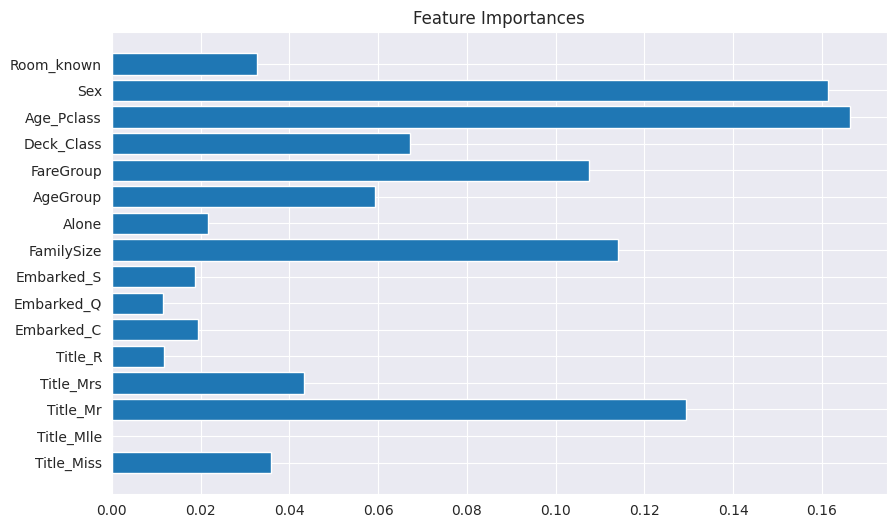

In [341]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importances")
plt.show()

In [42]:
forest_X_train = df_train.copy()
forest_X_train = clean(forest_X_train)
forest_y_train = df_train['Survived']
forest_X_test = df_test.copy()
forest_X_test = clean(forest_X_test)

In [43]:
forest_X_test = forest_X_test.drop(['PassengerId'], axis=1)

KeyError: "['PassengerId'] not found in axis"

In [723]:


param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100,],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42, 69],
    'n_jobs': [-1],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy',verbose=1)
grid_search.fit(forest_X_train, forest_y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 69}


/home/kamcio/Coding/Python/test/tensor/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kamcio/Coding/Python/test/tensor/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kamcio/Coding/Python/test/tensor/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/kamcio/Coding/Python/test/tensor/lib/python3.11/site-packages/sklearn/base.py", line 666, in 

In [44]:

last = RandomForestClassifier(criterion='gini', n_estimators=1000, max_depth=9, max_features=0.5, min_samples_split=2, class_weight='balanced')
scores = cross_val_score(last, forest_X_train, forest_y_train, cv=15, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Cross-validation accuracy: 0.828 ± 0.035


In [753]:
last.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=0.5,
                       n_estimators=1000)

In [756]:
test_predictions = last.predict(forest_X_test)
test_predictions = (test_predictions > 0.5).astype(int)

In [757]:

submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('predictions.csv', index=False)

$$
\text{Neural Network}
$$

In [11]:
from sklearn.preprocessing import StandardScaler

train_data = tf.data.Dataset.from_tensor_slices(
    (X_train.astype(np.float32), y_train.values.astype(np.float32))
)
test_data = tf.data.Dataset.from_tensor_slices(
    (X_test.astype(np.float32), y_test.values.astype(np.float32))
)

BATCH = 64
train_data = train_data.batch(BATCH).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH).prefetch(tf.data.AUTOTUNE)


I0000 00:00:1737976546.970996   38029 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5637 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


In [12]:
X_test.shape

(179, 22)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
history = model.fit(
    train_data,
    validation_data = test_data,
    epochs=100,
    callbacks=[early_stop],
)

Epoch 1/100


I0000 00:00:1737976553.560228   38226 service.cc:148] XLA service 0x7f66b0023a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737976553.560442   38226 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-01-27 11:15:53.606020: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737976553.778897   38226 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4688 - loss: 1.0100

I0000 00:00:1737976554.631966   38226 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5414 - loss: nan - val_accuracy: 0.5866 - val_loss: nan
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6127 - loss: nan - val_accuracy: 0.5866 - val_loss: nan
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6127 - loss: nan - val_accuracy: 0.5866 - val_loss: nan
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6127 - loss: nan - val_accuracy: 0.5866 - val_loss: nan
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6127 - loss: nan - val_accuracy: 0.5866 - val_loss: nan
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6127 - loss: nan - val_accuracy: 0.5866 - val_loss: nan


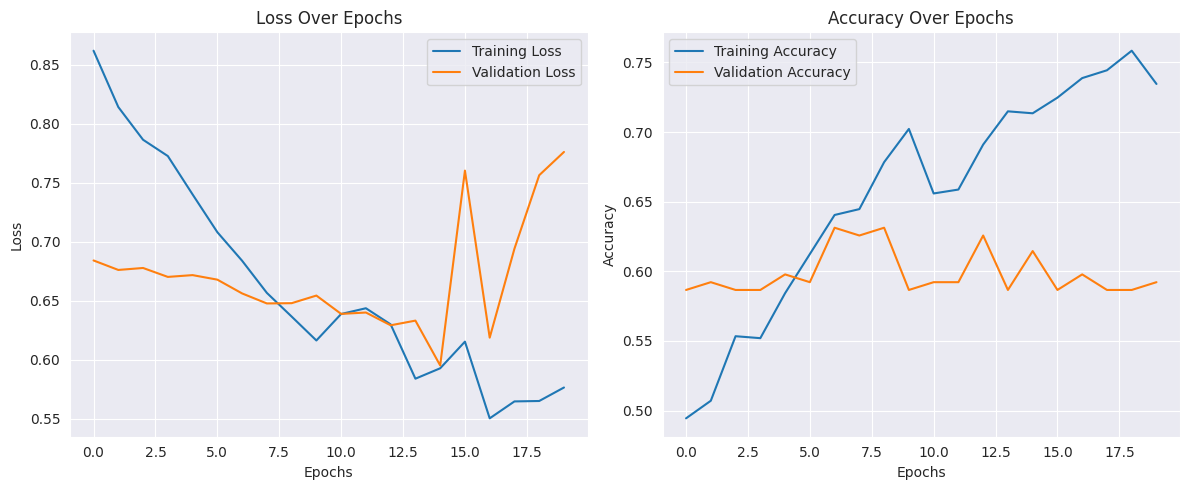

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history.history['loss'], label='Training Loss')
sns.lineplot(data=history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(data=history.history['accuracy'], label='Training Accuracy')
sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [506]:
neural_test = df_test.copy()

In [507]:
neural_test = clean(neural_test)

In [511]:
neural_test = neural_test.drop(['PassengerId'],axis=1)

In [512]:
neural_test.head()

,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare,Room,Pclass,Sex,Alone
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.452723,0.000,0.000000,0.015282,0.315385,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.617566,0.125,0.000000,0.013663,0.315385,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.815377,0.000,0.000000,0.018909,0.315385,0.5,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.353818,0.000,0.000000,0.016908,0.315385,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.287881,0.125,0.111111,0.023984,0.315385,1.0,0.0,0.0


In [513]:
test_prob = model.predict(neural_test)
test_pred = (test_prob > 0.5).astype(int).flatten()


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [514]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': test_pred
})

submission.to_csv('titanic_nn_predictions.csv', index=False)